### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [68]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [69]:
from sklearn.datasets import load_boston
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [70]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [71]:
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

Масштабируйте данные с помощью StandardScaler.

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.694865,0.000000,2.628491,0.0,5.222922,7.485465,3.479940,0.986899,2.797502,4.012849,9.074814,3.821411,3.507672
1,0.070779,0.000000,1.182095,0.0,4.576437,8.233447,2.020726,2.113421,0.466250,1.849767,9.434213,4.325931,1.192693
2,0.003910,1.513591,0.880036,0.0,3.724947,8.511471,0.833326,3.119769,0.116563,1.831691,7.592295,3.961045,1.102572
3,0.795393,0.000000,2.628491,0.0,5.222922,8.613084,3.043606,0.949832,2.797502,4.012849,9.074814,0.027555,3.279554
4,0.081881,0.000000,1.182095,0.0,4.576437,8.082440,2.485671,1.783577,0.466250,1.849767,9.434213,4.274867,1.588380


In [74]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.010354,0.000000,0.588143,0.000000,4.338258,9.054816,3.007841,1.243219,0.582813,1.783488,7.457520,4.324619,1.272957
1,0.006367,1.729819,0.930864,3.874063,3.802355,9.537476,1.176670,1.915637,0.466250,1.530426,7.906769,4.339928,0.497073
2,0.011929,0.000000,4.028417,0.000000,5.180390,8.443729,3.533587,0.877624,0.466250,4.283988,9.029889,4.265682,2.544506
3,0.010338,0.000000,1.569834,0.000000,3.513138,8.559455,0.278967,2.483948,0.466250,1.837716,8.625566,4.274430,0.777292
4,0.574248,0.000000,2.628491,0.000000,6.065055,8.886873,3.283232,1.112569,2.797502,4.012849,9.074814,4.210790,2.431855


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [75]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

X_train_tsne[:15]

array([[ 18.104149 ,  29.184141 ],
       [  3.3644612,  -7.9096684],
       [-20.716751 ,  -8.947255 ],
       [ 27.654587 ,  26.63646  ],
       [  4.3594193,  -7.4392295],
       [-11.870867 ,  -3.1969652],
       [ -9.884218 ,  -3.1191561],
       [-26.781433 , -15.031116 ],
       [ 28.505983 ,  27.472929 ],
       [ 29.786797 ,  24.498985 ],
       [-10.329162 ,  -2.7037444],
       [ -6.0654535,  -9.15263  ],
       [ -5.617904 , -13.584176 ],
       [ 28.621098 ,  24.620079 ],
       [ -7.1150546, -14.5416355]], dtype=float32)

Постройте диаграмму рассеяния на этих данных.

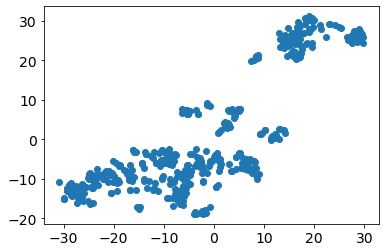

In [76]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

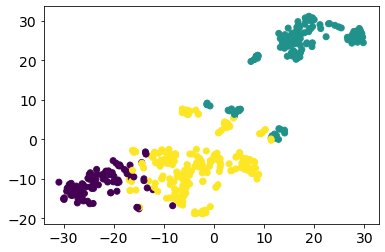

In [78]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)

Вычислите средние значения price и CRIM в разных кластерах.

In [79]:
m_for_train = {}
for i in range(0,3):
    m_for_train[i] = [round(y_train[labels_train == i].mean()[0], 2), round(X_train.loc[(labels_train == i), "CRIM"].mean(), 2)]

print('     price\tCRIM\n')
for i in range(0,3):
    print(f'{i}:   {m_for_train[i][0]}\t{m_for_train[i][1]}')

     price	CRIM

0:   27.79	0.07
1:   16.17	10.8
2:   24.96	0.42


### *Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [80]:
labels_test = kmeans.predict(X_test_scaled)

m_for_test = {}
for i in range(0,3):
    m_for_test[i] = [round(y_test[labels_test == i].mean()[0], 2), round(X_test.loc[(labels_test == i), "CRIM"].mean(), 2)]
    
print('     price\tCRIM\n')
for i in range(0,3):
    print(f'{i}:   {m_for_test[i][0]}\t{m_for_test[i][1]}')

     price	CRIM

0:   31.35	0.06
1:   16.44	10.17
2:   21.86	0.27
